In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, cluster, metrics

sns.set(style="whitegrid")
%matplotlib inline

In [2]:
# Load from your CSV file
df = pd.read_csv("iris.csv")  # Make sure iris.csv is in the same folder as this notebook
cols = df.columns[:-1]  # assuming the last column is 'Name' or the target
df.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Scale the features
X_scaled = preprocessing.MinMaxScaler().fit_transform(df[cols])

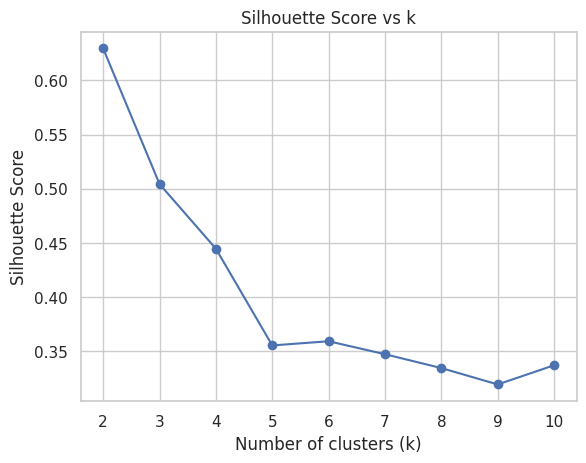

In [4]:
# Compute silhouette scores for k = 2 to 10
sil_scores = []
for k in range(2, 11):
    kmeans = cluster.KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    sil = metrics.silhouette_score(X_scaled, labels)
    sil_scores.append(sil)

# Plot silhouette scores
plt.plot(range(2, 11), sil_scores, marker='o')
plt.title("Silhouette Score vs k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

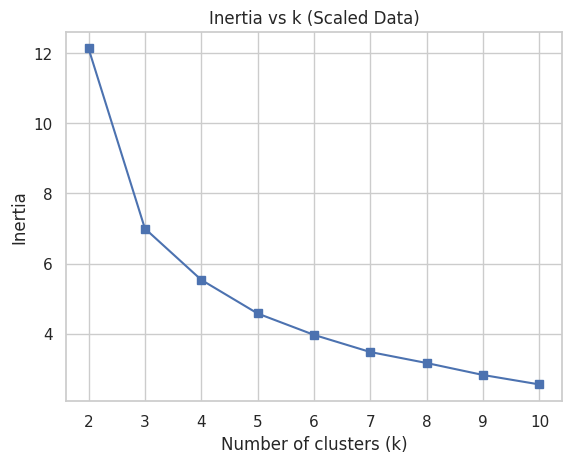

In [5]:
# ---- 2. Inertia vs k (scaled data) ----
inertias = []
for k in range(2, 11):
    kmeans = cluster.KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

plt.plot(range(2, 11), inertias, marker='s')
plt.title("Inertia vs k (Scaled Data)")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.show()

In [6]:
# ---- 3. Repeat with UN-SCALED data ----
X_unscaled = df[cols].values

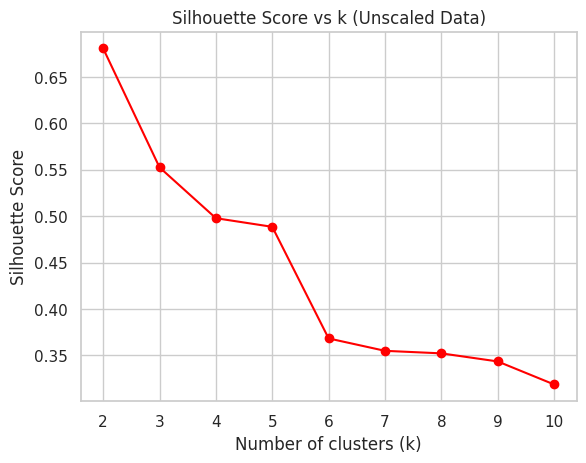

In [7]:
# Silhouette Score vs k (unscaled)
sil_scores_unscaled = []
for k in range(2, 11):
    kmeans = cluster.KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_unscaled)
    labels = kmeans.labels_
    sil = metrics.silhouette_score(X_unscaled, labels)
    sil_scores_unscaled.append(sil)

plt.plot(range(2, 11), sil_scores_unscaled, marker='o', color='red')
plt.title("Silhouette Score vs k (Unscaled Data)")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

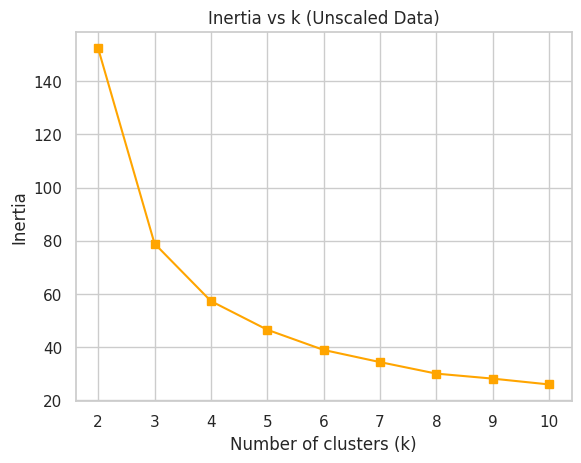

In [8]:
# Inertia vs k (unscaled)
inertias_unscaled = []
for k in range(2, 11):
    kmeans = cluster.KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_unscaled)
    inertias_unscaled.append(kmeans.inertia_)

plt.plot(range(2, 11), inertias_unscaled, marker='s', color='orange')
plt.title("Inertia vs k (Unscaled Data)")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.show()

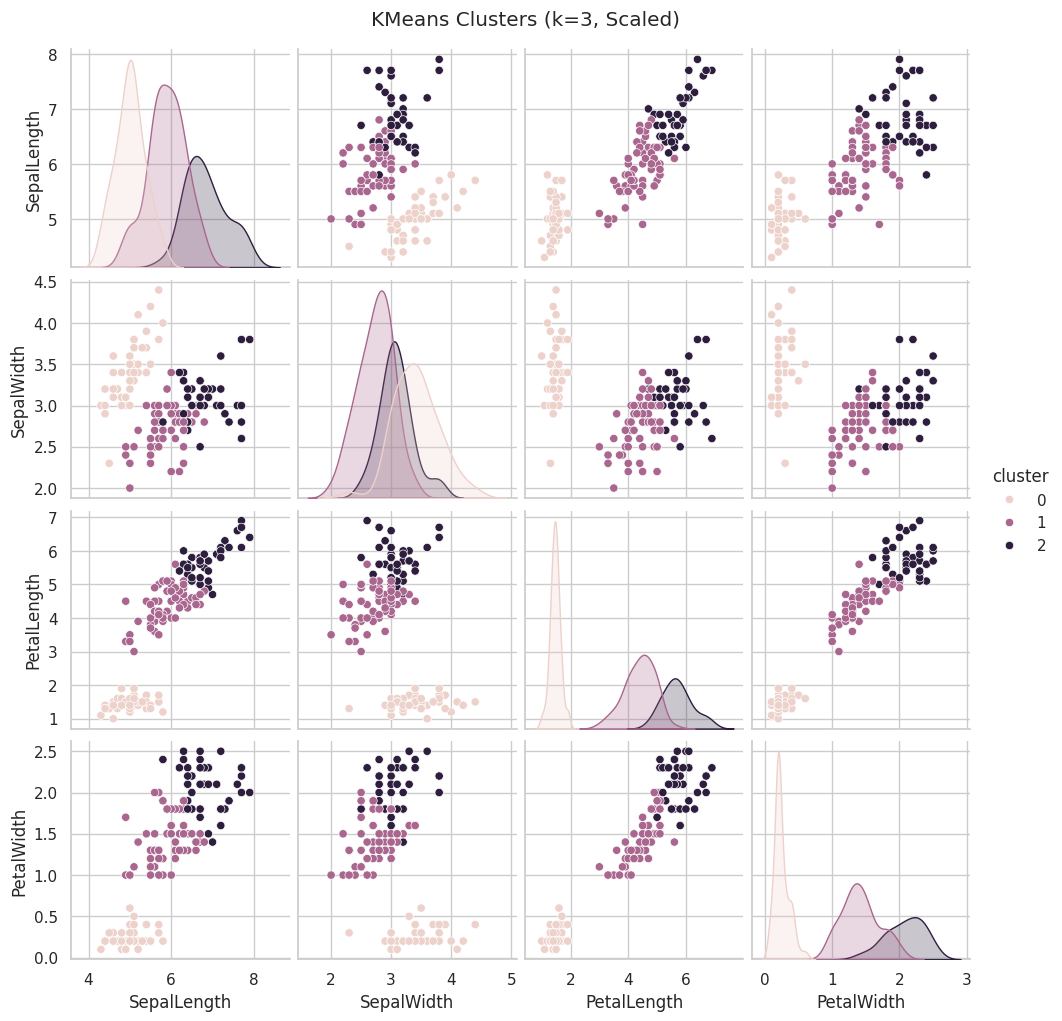

In [9]:
# ---- 4. Visualize clusters for best k (scaled data) ----
best_k = 3
kmeans = cluster.KMeans(n_clusters=best_k, n_init=10, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)

sns.pairplot(df, vars=cols, hue='cluster')
plt.suptitle("KMeans Clusters (k=3, Scaled)", y=1.02)
plt.show()

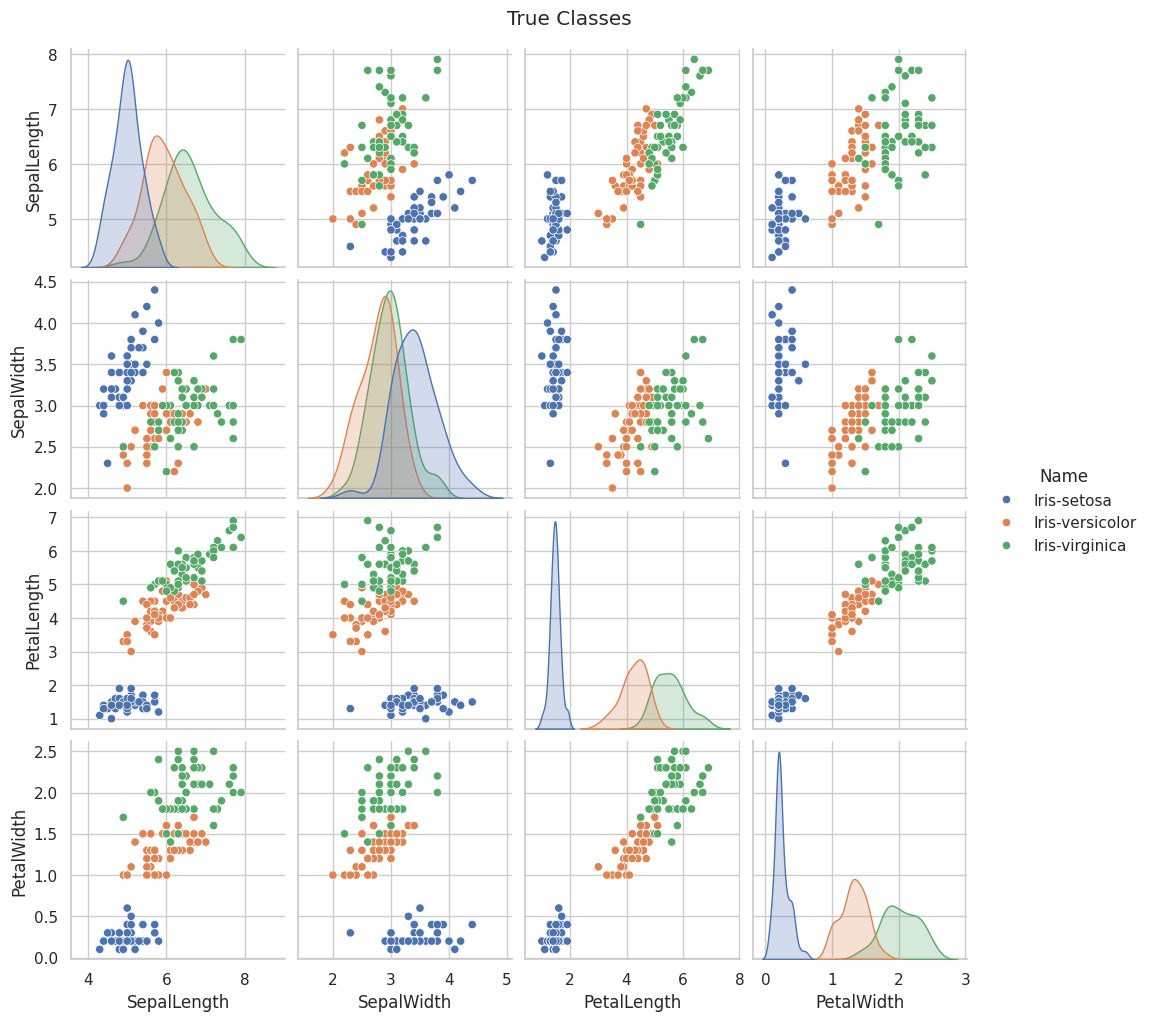

In [10]:
# ---- 5. Visualize true classes ----
sns.pairplot(df, vars=cols, hue='Name')
plt.suptitle("True Classes", y=1.02)
plt.show()

Q3. What if you don’t scale your features?

If you don’t scale your features, variables with larger ranges (like petal length vs sepal width) dominate the distance calculations in KMeans. This can lead to biased clusters, poor performance, and misleading inertia/silhouette scores. You saw this when silhouette scores dropped without scaling.



Q4. Is there a 'right' k? Why or why not?

There’s no single “right” value of k. Instead, we look for the best compromise using tools like:

Elbow Method (Inertia Plot): Look for where the inertia curve bends (“elbow”).

Silhouette Score: Choose the k with the highest silhouette score.

Domain Knowledge: What makes sense for the application?
In practice, clustering is exploratory, and the "right" k balances interpretability and performance.

